### Week5-9. 극대 극소값 찾기

이제 극소와 극대값을 찾아보자. 극소와 극대값은 주변 포인트에서 아래의 관계를 만족해야 한다.

$$극대: y_{i-1} < y_{i} > y_{i+1}, 극소: y_{i-1} > y_{i} < y_{i+1}$$


또 찾은 극값들을 경계와 비교하여 실제 찾은 극값들이 극소와 극대가 되는지 확인한다.


Minima: [(0.7000000000000001, -0.5772302750838405), (2.152, -0.006670480742256502), (3.66, -7.333826733936654e-07)]
Maxima: [(0.0, 1.0), (1.416, 0.10965467991643564), (2.9, 0.00012651823896373234)]


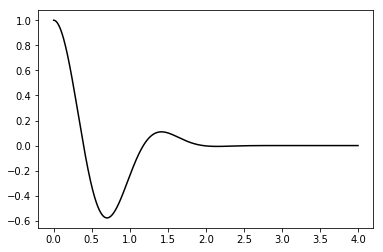

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def brute_force_optimizer(f, a, b, n):
    x = np.linspace(a, b, n)
    y = f(x)
    # Let maxima and minima hold the indices corresponding
    # to (local) maxima and minima points
    minima = []
    maxima = []
    for i in range(n-1):
        if y[i-1] < y[i] > y[i+1]:    # Except end point, y[-1] < y[0] > y[1] and y[n-3] < y[n-2] > y[n-1]
            maxima.append(i)
        if y[i-1] > y[i] < y[i+1]:
            minima.append(i)
            
    # What about the end points
    y_max_inner = max([y[i] for i in maxima])
    y_min_inner = min([y[i] for i in minima])
    if y[0] > y_max_inner:    # y[0] is maximum
        maxima.append(0)
    if y[len(x)-1] > y_max_inner: # y[n-1] as last index is maximum
        maxima.append(len(x)-1)
    if y[0] < y_min_inner:
        minima.append(0)
    if y[len(x)-1] < y_min_inner:
        minima.append(len(x)-1)
        
    # Return x and y values
    return [(x[i], y[i]) for i in minima], \
           [(x[i], y[i]) for i in maxima]

def demo():
    minima, maxima = brute_force_optimizer(
        lambda x: np.exp(-x**2)*np.cos(4*x), 0, 4, 1001)
    print('Minima:', minima)
    print('Maxima:', maxima)
    x=np.linspace(0,4,1001)
    plt.plot(x, np.exp(-x**2)*np.cos(4*x), color='k')

    
if __name__ == '__main__':
    demo()